# 12장. 다중 분류 문제 해결하기

#### 참고자료
* C:\Users\lenovo\Documents\aibootcamp\Deep Learning\딥러닝_보조교재\chap12.pdf

### 1. 다중 분류 문제
* 클래스가 두개가 아니라 여러개
* 참(1)과 거짓(0)으로 해결하는 것이 아니라, 여러 개 중에 어떤 것이 답인지 예측하는 문제
* 여러개의 답 중 하나를 고르는 분류문제를 **다중분류(multi classification)** 이라고 함
* 다중 분류 문제는 둘 중 하나를 고르는 이항 분류(binary classification)와는 접근 방식이 조금 다름.

### 2. 상관도 그래프

In [1]:
import pandas as pd
df = pd.read_csv('../모두의 딥러닝/data/iris3.csv')

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


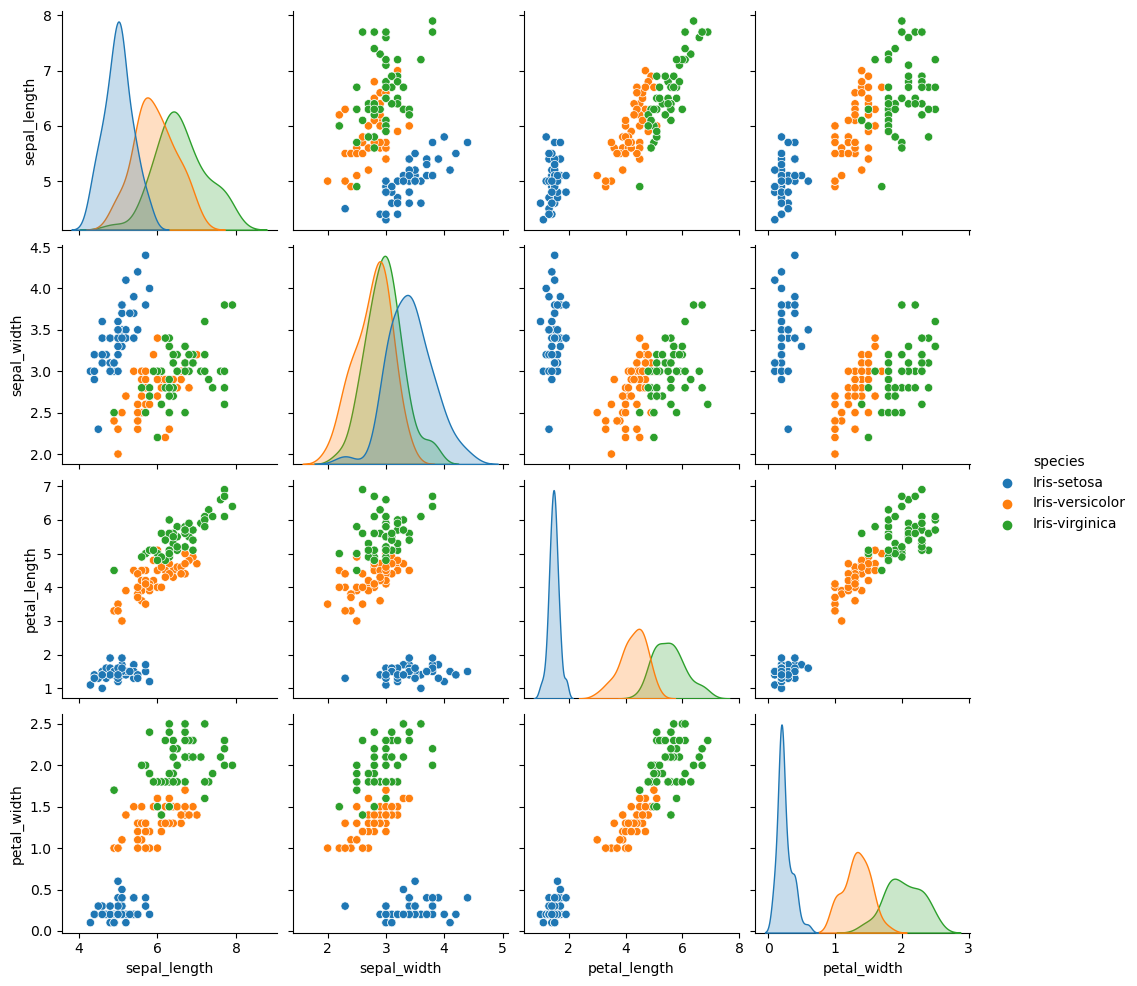

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue = 'species')
plt.show()

### 3. 원-핫 인코딩

In [4]:
# 속성을 X, 클래스를 y로 저장
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]
print( X[0:5] )
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


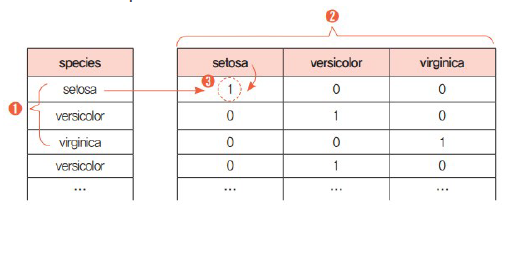

In [5]:
# one-hot encoding
y = pd.get_dummies(y)
print(y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0


### 4. 소프트맥스 

* 세 가지 확률을 모두 구해야 하므로 시그모이드 함수가 아닌 다른 함수가 필요함. => 소프트맥스 함수
* 각 항목당 예측 확률을 0과 1사이의 값으로 나타내 준다. 각 샘플의 예측확률의 총합이 1인 형태로 바꿔주게 된다. 
* acrivation 란에 'softmax' 라고 적어주는 것으로 소프트맥스 함수 바로 적용. 
* 손실함수 또한 이전과 달라져야 함.
* 이항분류에서 binary_crossentropy를 썼다면, 다항분류에서는 categorical_crossentropy를 쓰면된다.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim = 4, activation = 'relu'))    #input_dim 4를반드시 지켜야함
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation = 'softmax'))     # 출력층 노드 수 3을 반드시 지켜야함.   # activation function이 softmax로 바뀜.  # 3외의 다른 수를 입력하면 오류
model.summary()

#모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 실습
import numpy as np
iris1 = [[4.2,2.6,1,1.2]]
iris2 = [[6.0,2.8,5.0,2]]
print(np.round(model.predict(iris1)))
print(np.round(model.predict(iris2)))

1/1 [==============================] - 0s 164ms/step
[[0. 0. 0.]]
1/1 [==============================] - 0s 56ms/step
[[0. 0. 1.]]


# 13장. 모델 성능 검증하기

* 1986년 제프리 힌튼 교수가 오차 역전파를 발표한 직후, 존스 홉킨스의 세즈노프스키 교수는 오차 역전파가 은닉층의 가중치를 실제로 업데이트 시키는것을 확인하고 싶었음. 
* 그는 광석과 일반 암석에 수중 음파탐지기를 쏜 후 결과를 모아 데이터셋을 준비했고, 음파 탐지기의 수진 결과만 보고 광석인지 일반 암석인지 구분하는 모델을 만들었음. 

### 1. 데이터의 확인과 예측 실행

In [8]:
import pandas as pd
df = pd.read_csv('../모두의 딥러닝/data/sonar3.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [9]:
# 일반 암석(0), 광석(1)
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [10]:
# 음파 관한 속성 X, 광물의 종류 y
X = df.iloc[:, 0:60]
y = df.iloc[:, 60]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일
# 손실함수 평균제곱오차, 교차엔트로피오차 중 교차엔트로피오차를 적용하기 위해  binary_crossentropy 선택
model. compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])        # 실제값과 예측값의 차이가 많이 나면 optimizer로 
#모델 실행
history = model.fit(X, y, epochs = 200, batch_size = 10)

# 결과가 100%가 나왔다. => overfitting(과적합). 주어진 문제에 대해서는 잘 맞추지만(훈련된 문제에 대해서) 새로운 문제에 대해서는 잘 맞추지 x 

Epoch 1/200


21/21 [==============================] - 1s 2ms/step - loss: 0.7067 - accuracy: 0.5192
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6442
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6298
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6394
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6635
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6779
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.6779
Epoch 8/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.6779
Epoch 9/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.7212
Epoch 10/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.6923
Epoch 11/200
21/21 [=

* 과적합(overfitting)이란 모델이 학습 데이터셋 안에서 일정 수준 이상의 예측 정확도를 보이지만, 새로운 데이터에 적용하면 잘 맞지 않는 것을 의미. 
* 아래 그래프에서 빨간색 선을 보면 주어진 샘플에 정학히 맞게끔 그어져 있다. 
* 이 선은 너무 주어진 샘플에만 최적화 되어있음.

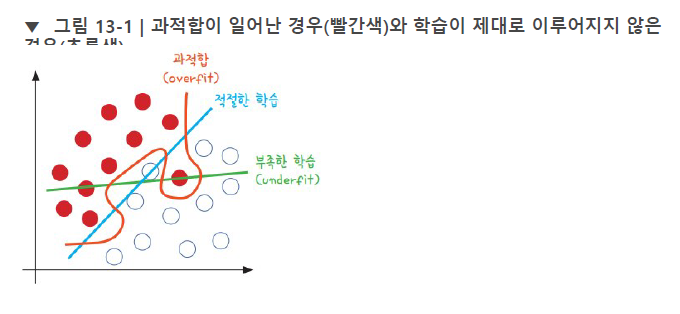

### 3. 학습셋과 테스트셋
* 딥러닝, 머신러닝의 목표는 학습셋에서만 잘 작동하는 모델을 만드는 것이 아니다. 
* 새로운 데이터에 대해 높은 정확도를 안정되게 보여주는 모델을 만드는 것이 목표.
* 모델 성능의 향상을 위한 방법에는 크게 **데이터를 보강하는 방법**과 **알고리즘**을 최적화하는 방법이 있음. 
* 데이터를 이용해 성능을 향상시키려면 충분한 데이터를 가져와 추가하면 된다. 
* 특히 딥러닝의 경우 샘플 수가 많을수록 성능이 좋아짐을 보여준다.  
* (여기에서) 신경망을 만들어 70개의 샘플로 학습을 진행한 후 이 학습의 결과를 저장. 이렇게 저장된 파일을 '모델'이라고 함.
* 모델은 다른 셋에 적용할 경우, 학습단계에서 각인되었던 그대로 다시 수행

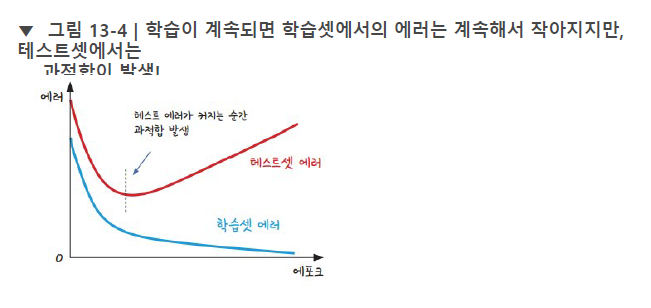

* 학습을 진행해도 테스트 결과가 더 이상 좋아지지 않는 지점에서 학습을 멈추어야함
* 이 때 학습 정도가 가장 적절한 것으로 볼 수 있다. 

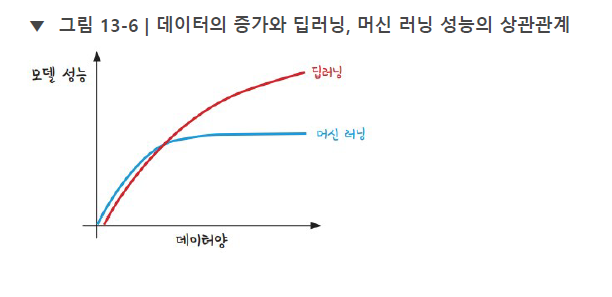

In [12]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd

In [13]:
# 학습 셋과 테스트 셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True) 

In [14]:
#모델을 설정합니다, 
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델을 컴파일합니다. 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델을 실행합니다. 
history = model.fit(X_train, y_train, epochs = 200, batch_size = 10)

Epoch 1/200
15/15 [==============================] - 1s 721us/step - loss: 0.6858 - accuracy: 0.5310
Epoch 2/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5793
Epoch 3/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.6828
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.7103
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.7724
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7517
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.7379
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.8000
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7862
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.8069
Epoch 1

In [15]:
print(X_test.head())

         0       1       2       3       4       5       6       7       8   \
126  0.0715  0.0849  0.0587  0.0218  0.0862  0.1801  0.1916  0.1896  0.2960   
55   0.0201  0.0116  0.0123  0.0245  0.0547  0.0208  0.0891  0.0836  0.1335   
118  0.0363  0.0478  0.0298  0.0210  0.1409  0.1916  0.1349  0.1613  0.1703   
91   0.0253  0.0808  0.0507  0.0244  0.1724  0.3823  0.3729  0.3583  0.3429   
93   0.0459  0.0437  0.0347  0.0456  0.0067  0.0890  0.1798  0.1741  0.1598   

         9   ...      50      51      52      53      54      55      56  \
126  0.4186  ...  0.0216  0.0153  0.0121  0.0096  0.0196  0.0042  0.0066   
55   0.1199  ...  0.0032  0.0076  0.0045  0.0056  0.0075  0.0037  0.0045   
118  0.1444  ...  0.0250  0.0115  0.0190  0.0055  0.0096  0.0050  0.0066   
91   0.2197  ...  0.0085  0.0178  0.0073  0.0079  0.0038  0.0116  0.0033   
93   0.1408  ...  0.0121  0.0067  0.0032  0.0109  0.0164  0.0151  0.0070   

         57      58      59  
126  0.0099  0.0083  0.0124  
55   0.0

In [16]:
print(y_test.head())

126    1
55     0
118    1
91     0
93     0
Name: 60, dtype: int64


In [17]:
# 모델을 테스트셋에 적용해 정확도를 구한다. 
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

2/2 [==============================] - 0s 18ms/step - loss: 0.8613 - accuracy: 0.7619
Test accuracy:  0.761904776096344


### 4. 모델 저장과 재사용

In [18]:
# 모델 저장
model.save('../model/my_model.hdf5')

c:\Users\lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# 테스트를 위해 조금 전 사용한 모델을 메모리에서 삭제
del model

In [20]:
# 모델을 새로 불러옴
model = load_model('../model/my_model.hdf5')

# 불러온 모델을 테스트셋에 적용해 정확도를 구합니다. 
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

2/2 [==============================] - 0s 0s/step - loss: 0.8613 - accuracy: 0.7619
Test accuracy:  0.761904776096344


### 5. k겹 교차 검증

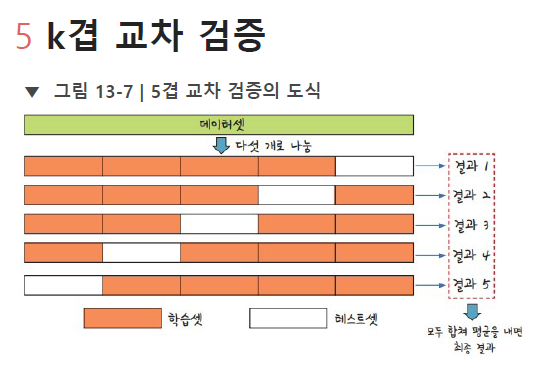

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd
df= pd.read_csv('../모두의 딥러닝/data/sonar3.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [22]:
X = df.iloc[:, 0:60]
y = df.iloc[:,60]

In [23]:
# 몇 겹으로 나눌 것인지 정한다.
k = 5
# kFold 함수를 불러온다. 분할 하기 전에 선물이 치우치지 않도록 섞어준다
kfold = KFold(n_splits = k, shuffle = True)
acc_score = []
def model_fn():
    model = Sequential()
    model.add(Dense(24, input_dim = 60, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    return model
# k겹 교차 검증을 이용해 k번의 학습을 실행한다.
for train_index, test_index in kfold.split(X):  # K겹 교차 검증을 이용해 k번의 학습을 실행
    X_train, X_test = X.iloc[train_index, : ], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = model_fn()
    model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])
    # verbose = 0  (출력하지 않음 X) / verbose = 1  (정보를 상세하게 출력함) / verbose = 2  (정보를 함축적으로 출력함)
    history = model.fit(X_train, y_train, epochs = 200, batch_size = 10, verbose = 0)
    accuracy = model.evaluate(X_test, y_test)[1]
    print(accuracy)
    acc_score.append(accuracy)
avg_acc_score = sum(acc_score)/k    # k번 실시된 정확도의 평균을 구함
print('정확도: ', acc_score)
print('정확도 평균: ', avg_acc_score)

2/2 [==============================] - 0s 4ms/step - loss: 0.3413 - accuracy: 0.8810
0.8809523582458496
2/2 [==============================] - 0s 5ms/step - loss: 1.3059 - accuracy: 0.7857
0.7857142686843872
2/2 [==============================] - 0s 4ms/step - loss: 0.9987 - accuracy: 0.7143
0.7142857313156128
2/2 [==============================] - 0s 0s/step - loss: 0.6100 - accuracy: 0.8293
0.8292682766914368
2/2 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.7805
0.7804877758026123
정확도:  [0.8809523582458496, 0.7857142686843872, 0.7142857313156128, 0.8292682766914368, 0.7804877758026123]
정확도 평균:  0.7981416821479798


# 14. 모델 성능 향상시키기

##### HDF5의 특징 
* HDF5를 이해하는 가장 중요한 개념은 그룹(Group), 데이터셋(Dataset), 속성(attribute)이다. <br>
디렉토리 구조와 비슷한데, 그룹=디렉토리, 데이터셋=파일로 이해하면 쉽다. 
* 속성은 일종의 메타데이터로 그룹이나 데이터셋을 부연 설명하는 것을 의미한다. <br>HDF5 파일을 생성하면 먼저 /라는 루트 그룹이 생성되고 그 하위에 트리 구조로 다른 그룹을 생성할 수 있다. 그룹하위에 다른 그룹이 있을 수도 있고, 데이터셋이 존재할 수도 있다. 즉, 완전히 운영체계의 디렉토리-파일 구조와 일치한다. 
* 또 다른 특징은 속성인데 속성은 데이터셋이나 그룹을 설명하는데 사용하는데 이를 사용자가 정의하게 된다. 
* 정리하면 HDF5는 Hierarchical Data Format이며 self-describing이 되는 고성능 데이터포맷 또는 DB 정도로 이해할 수 있다. <br>
운영체계와 무관하게 사용할 수 있으며, 대용량 데이터를 빠르게 읽고 쓸 수 있다.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('../모두의 딥러닝/data/wine.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


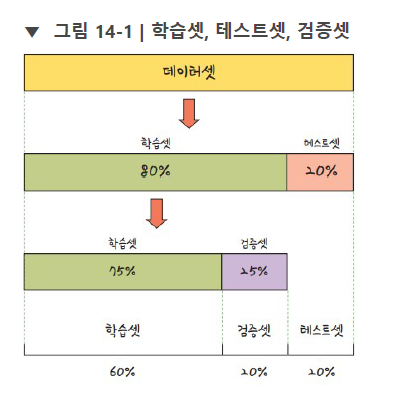

In [25]:
# 와인의 속성을 X로, 와인의 분류를 y로 저장
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [26]:
# 학습셋과 테스트셋으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

# 모델 구조를 설정한다. 
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

#모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행
history = model.fit(X_train, y_train, epochs = 50, batch_size = 500, validation_split = 0.25)
# 0.8 * 0.25 = 0.2

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                390       
                                                                 
 dense_25 (Dense)            (None, 12)                372       
                                                                 
 dense_26 (Dense)            (None, 8)                 104       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
8/8 [==============================] - 1s 40ms/step - loss: 0.5203 - accuracy: 0.7152 - val_loss: 0.4486 - val_accuracy: 0.7608
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.4538 - accuracy: 0.7555 - val_loss: 0.3697 - val_accuracy: 0.7877
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3786 - accuracy: 0.8078 - val_loss: 0.3526 - val_accuracy: 0.8646
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3512 - accuracy: 0.8640 - val_loss: 0.3116 - val_accuracy: 0.8746
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3227 - accuracy: 0.8689 - val_loss: 0.2890 - val_accuracy: 0.8908
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2962 - accuracy: 0.8976 - val_loss: 0.2686 - val_accuracy: 0.9185
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2691 - accuracy: 0.9117 - val_loss: 0.2446 - val_accuracy: 0.9177
Epoch 8/50
8/8 [================

In [27]:
# 테스트 결과를 출력한다. 
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1352 - accuracy: 0.9546
Test accuracy:  0.9546154141426086


### 2. 모델 업데이트하기

In [28]:
# 학습셋과 테스트셋으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

# 모델 구조를 설정한다. 
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

#모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행
history = model.fit(X_train, y_train, epochs = 50, batch_size = 500, validation_split = 0.25)
# 0.8 * 0.25 = 0.2

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 30)                390       
                                                                 
 dense_29 (Dense)            (None, 12)                372       
                                                                 
 dense_30 (Dense)            (None, 8)                 104       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 


Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 58ms/step - loss: 1.0568 - accuracy: 0.7819 - val_loss: 0.8596 - val_accuracy: 0.8031
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6050 - accuracy: 0.8312 - val_loss: 0.4131 - val_accuracy: 0.8585
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3531 - accuracy: 0.8635 - val_loss: 0.3290 - val_accuracy: 0.8677
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2896 - accuracy: 0.9009 - val_loss: 0.2684 - val_accuracy: 0.9138
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2642 - accuracy: 0.9117 - val_loss: 0.2606 - val_accuracy: 0.9185
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2523 - accuracy: 0.9163 - val_loss: 0.2504 - val_accuracy: 0.9208
Epoch 7/5

#### 모델의 저장 설정 및 실행

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

#모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 저장의 조건 설정
modelpath = '../model/all/{epoch:02d}-{val_accuracy: .4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, verbose = 1)

#모델 실행
history = model.fit(X_train, y_train, epochs = 50, batch_size = 500, validation_split = 0.25, verbose = 0, callbacks = [checkpointer])


Epoch 1: saving model to ../data//model/all\01- 0.9462.hdf5

Epoch 2: saving model to ../data//model/all\02- 0.9646.hdf5

Epoch 3: saving model to ../data//model/all\03- 0.9646.hdf5


c:\Users\lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to ../data//model/all\04- 0.9508.hdf5

Epoch 5: saving model to ../data//model/all\05- 0.9585.hdf5

Epoch 6: saving model to ../data//model/all\06- 0.9608.hdf5

Epoch 7: saving model to ../data//model/all\07- 0.9577.hdf5

Epoch 8: saving model to ../data//model/all\08- 0.9638.hdf5

Epoch 9: saving model to ../data//model/all\09- 0.9554.hdf5

Epoch 10: saving model to ../data//model/all\10- 0.9562.hdf5

Epoch 11: saving model to ../data//model/all\11- 0.9677.hdf5

Epoch 12: saving model to ../data//model/all\12- 0.9677.hdf5

Epoch 13: saving model to ../data//model/all\13- 0.9692.hdf5

Epoch 14: saving model to ../data//model/all\14- 0.9708.hdf5

Epoch 15: saving model to ../data//model/all\15- 0.9515.hdf5

Epoch 16: saving model to ../data//model/all\16- 0.9523.hdf5

Epoch 17: saving model to ../data//model/all\17- 0.9692.hdf5

Epoch 18: saving model to ../data//model/all\18- 0.9654.hdf5

Epoch 19: saving model to ../data//model/all\19- 0.9669.hdf5

Epoch 20: sav

In [30]:
# 테스트 결과를 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9692
Test accuracy:  0.9692307710647583


### 3. 그래프로 과적합 확인하기 

In [31]:
# 그래프 확인을 위한 긴 학습
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split = 0.25)

Epoch 1/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0786 - accuracy: 0.9738 - val_loss: 0.0899 - val_accuracy: 0.9769
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0756 - accuracy: 0.9761 - val_loss: 0.0879 - val_accuracy: 0.9723
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0744 - accuracy: 0.9764 - val_loss: 0.0927 - val_accuracy: 0.9700
Epoch 4/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0767 - accuracy: 0.9743 - val_loss: 0.0989 - val_accuracy: 0.9677
Epoch 5/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0752 - accuracy: 0.9769 - val_loss: 0.0842 - val_accuracy: 0.9738
Epoch 6/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.0723 - accuracy: 0.9774 - val_loss: 0.0839 - val_accuracy: 0.9723
Epoch 7/2000
8/8 [==============================] - 0s 27ms/step - loss: 0.0721 - accuracy: 0.9777 - val_loss: 0.0853 - val_accuracy: 0.9731
Epoch 8/2000
8/8 

In [32]:
# history에 저장된 학습 결과 확인
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.078560,0.973826,0.089904,0.976923
1,0.075564,0.976135,0.087884,0.972308
2,0.074388,0.976392,0.092699,0.970000
3,0.076734,0.974339,0.098880,0.967692
4,0.075163,0.976905,0.084197,0.973846
...,...,...,...,...
1995,0.024996,0.991019,0.054115,0.983846
1996,0.016677,0.994868,0.030661,0.990000
1997,0.015273,0.994868,0.031029,0.990000
1998,0.015689,0.995381,0.030675,0.990000


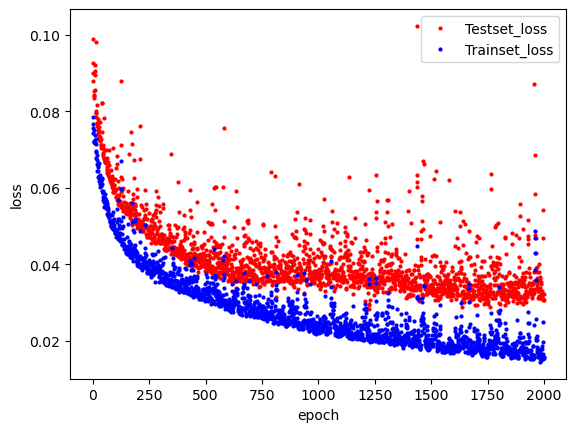

In [33]:
# y_vloss에 테스트셋(여기서는 검증셋) 의 오차를 저장
y_vloss = hist_df['val_loss']
# y_vloss = history.history['val_loss']   #이렇게 해도 됨. 위처럼 해도 되지만

#y_loss에 학습셋의 오차를 저장
y_loss = hist_df['loss']
# y_loss = history.history['loss']   #이렇게 해도 됨. 위처럼 해도 되지만

# x값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize = 2, label = 'Testset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize = 2, label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 4. 학습의 자동 중단

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단될지 설정합니다.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)        #20번까지 찾고 향상되지 않으면 학습을 종료.
# monitor = 'val_loss', patience = 20이라고 지정하면 검증셋의 오차가 20번 이상 낮아지지 않을 경우 학습을 종료하라는 의미

# 최적화 모델이 저장될 폴더와 모델의 이름을 정한다.
modelpath = '../model/Ch14-4-bestmodel.hdf5'

#최적화모델을 업데이트하고 저장한다. 

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)

# 모델 실행
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split = 0.25, verbose = 1, callbacks = [early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 29ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0313 - val_accuracy: 0.9908
Epoch 2/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0364 - val_accuracy: 0.9885
Epoch 3/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0091 - accuracy: 0.9980

c:\Users\lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 12ms/step - loss: 0.0151 - accuracy: 0.9946 - val_loss: 0.0359 - val_accuracy: 0.9877
Epoch 4/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.9944 - val_loss: 0.0328 - val_accuracy: 0.9877
Epoch 5/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0348 - val_accuracy: 0.9892
Epoch 6/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0310 - val_accuracy: 0.9900
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 0.9928 - val_loss: 0.0421 - val_accuracy: 0.9854
Epoch 8/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0172 - accuracy: 0.9936 - val_loss: 0.0373 - val_accuracy: 0.9869
Epoch 9/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0169 - accuracy: 0.9951 - val_loss: 0.0384 - val_accuracy: 0.9869
Epoch 10/2000
8/8 [============